In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as smf

In [4]:
start_date= '2023-02-19'
end_date="2023-03-08"

#ticker=["GOOGL"]
ticker=["^IQHGCPI"]
msft=yf.Ticker('^IQHGCPI')

In [7]:
data = yf.download(ticker,start_date,end_date)
hist  = msft.history(period='5d')



[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^IQHGCPI: Period 'max' is invalid, must be one of ['1d', '5d']
^IQHGCPI: No data found for this date range, symbol may be delisted


In [41]:
# Return
data[["Return"]]=data[["Adj Close"]].pct_change()
print(data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-02-15  153.110001  155.500000  152.880005  155.330002  155.330002   
2023-02-16  153.509995  156.330002  153.350006  153.710007  153.710007   
2023-02-17  152.350006  153.000000  150.850006  152.550003  152.550003   
2023-02-21  150.199997  151.300003  148.410004  148.479996  148.479996   
2023-02-22  148.869995  149.949997  147.160004  148.910004  148.910004   

              Volume    Return  
Date                            
2023-02-15  65669300       NaN  
2023-02-16  68167900 -0.010429  
2023-02-17  59095900 -0.007547  
2023-02-21  58867200 -0.026680  
2023-02-22  51011300  0.002896  


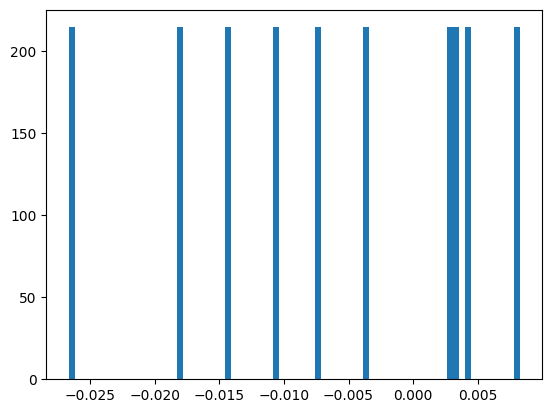

In [42]:
#voir la distribution du return
plt.hist(data["Return"], bins=75, density=75)
plt.show()


In [43]:
#mean of return
mean_return_day=np.mean(data["Return"])
mean_return_year=((1+np.mean(data["Return"]))**252)-1

In [44]:
# std of return
std_return=np.std((data["Return"]))


In [45]:
from scipy import stats 
stats.kstest(data["Return"].dropna(), stats.norm.cdf)

KstestResult(statistic=0.4967097590088293, pvalue=0.008387180817642448)

In [277]:
def data_returns(tickers,date1,date2):
    returns=pd.DataFrame()
    for i in range(len(tickers)):
        data=yf.download(tickers[i],date1,date2)
        returns[tickers[i]]=((data["Adj Close"].pct_change()).dropna())
       
    return returns

In [306]:
#tickers=["GOOGL", "MSFT", "GC=F", "TSLA",'AAPL', "BABA"]
#tickers=["CAT","DE","ETN","TT","GWW","URI","POOL","BLDR"]
#tickers=["JPM","MA","BRK-B","MS","BLK","GS","PYPL","DFS"]
#tickers=["^IXIC","^GSPC", "^DJI"]
#tickers=["ETN","TT","MA","MS"]
tickers=[""]

In [328]:
tada=data_returns(tickers,start_date,end_date)
tada

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,JPM,MA,BRK-B,MS,BLK,GS,PYPL,DFS
Date,,,,,,,,
2023-02-22,-0.007663,-0.002781,0.001453,-0.003585,-0.011987,-0.000637,0.003190,0.009675
2023-02-23,0.008011,0.001578,-0.000297,0.006888,0.006445,0.007343,-0.003842,0.010221
2023-02-24,0.009021,-0.006779,0.003135,-0.002451,-0.012156,0.000853,-0.021811,0.013731
2023-02-27,0.008728,0.006683,0.002105,-0.010235,-0.000541,0.004617,0.002991,-0.006862
2023-02-28,0.008371,-0.000534,0.001707,-0.002068,0.009326,-0.037972,-0.002304,0.004935
2023-03-01,-0.005581,-0.005038,-0.001835,-0.003212,-0.012866,-0.008363,0.002989,0.008393
2023-03-02,-0.010382,0.005856,0.010275,-0.001144,0.007861,0.008289,0.003793,-0.005047
2023-03-03,0.018360,0.016677,0.015272,0.023418,0.013602,0.022887,0.029555,0.021358


In [308]:
np.shape(tada)[1]

8

In [329]:
def Pond(n):
    """Donne la pondération pour un portefeuille composé de n actifs"""
    W=np.random.randint(1,10,n)  # Generation de n entiers compris entre 1 et 10
    W= W/np.sum(W) #  Normalisation pour aoir la somme de spondérations égale à 1
    return W


In [330]:
def Rentabilté(resultat):
    """ Retourne la rentabilité trimestriel de chaque actif """
    # act= list des actifs qui composeront le portefeuille
    mu=pd.DataFrame(["mean"])
    for i in range(np.shape(resultat)[1]):
        mu[resultat.columns[i]]= (1+np.mean(resultat.iloc[:,i]))**14-1
    return mu

Rentabilté(tada)

,0,JPM,MA,BRK-B,MS,BLK,GS,PYPL,DFS
0,mean,0.051714,0.027759,0.057139,0.013401,-0.000554,-0.005207,0.025783,0.10336


In [331]:
def Rentabilty(resultat):
    """ Retourne la rentabilité trimestriel de chaque actif """
    # act= list des actifs qui composeront le portefeuille
    mu=np.zeros(np.shape(resultat)[1])
    for i in range(np.shape(resultat)[1]):
        mu[i]= (1+np.mean(resultat.iloc[:,i]))**16-1
    return mu

Rentabilty(tada)

array([ 0.05931739,  0.0317874 ,  0.06556447,  0.01533016, -0.00063272,
       -0.00594866,  0.02952056,  0.11897357])

In [332]:
def Matcov(resultat):
    """Calculer la matrice de ariance coariance des différents actifs"""
    sigma= resultat.cov()* np.sqrt(12)
    return sigma

Matcov(tada)

,JPM,MA,BRK-B,MS,BLK,GS,PYPL,DFS
JPM,0.000357,0.000121,0.000058,0.000191,0.000172,0.000092,0.000093,0.000152
MA,0.000121,0.000202,0.000123,0.000176,0.000225,0.000266,0.000310,0.000011
BRK-B,0.000058,0.000123,0.000116,0.000139,0.000134,0.000201,0.000181,0.000041
MS,0.000191,0.000176,0.000139,0.000360,0.000225,0.000316,0.000324,0.000241
BLK,0.000172,0.000225,0.000134,0.000225,0.000412,0.000085,0.000284,-0.000011
GS,0.000092,0.000266,0.000201,0.000316,0.000085,0.001079,0.000367,0.000128
PYPL,0.000093,0.000310,0.000181,0.000324,0.000284,0.000367,0.000686,0.000096
DFS,0.000152,0.000011,0.000041,0.000241,-0.000011,0.000128,0.000096,0.000303


In [333]:
def PortfolioStat(act, sim=100):
    """Retourne la rentabilité et la ariances des différents portefeuilles simulés"""
    resultat= data_returns(act,start_date,end_date)
    mu= Rentabilty(resultat) #  Rentabilité des actifs
    sigma= Matcov(resultat)  # Matrice de variance covariance des différents  actifs
    n= int(len(act))
    W=np.zeros((sim,n))
    moy=np.zeros(sim)
    theta=np.zeros(sim)
    

    for i in range(sim):
        wi= Pond(n) # POndération de chaque portefeuille
        moy[i]= np.dot(wi.T,mu)   # Rentabilité espérée du portefeuille
        theta[i]  = np.dot(wi.T,np.dot(sigma, wi))   #Volatilité de chaque portefeuille
        W[i]= wi   # incrémenter au fur et à mesure une matrice des pondérations
         # incrémentation des moyennes
         # incrémentations des variances
    results= list()    #liste qui contiendra la matrice des pondérations, le vecteur rentabilité, et le vecteur variance pour chaque simulation
    results.append(W) 
    results.append(moy)
    results.append(theta)
    return results



In [334]:
data=PortfolioStat(tickers,50000)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


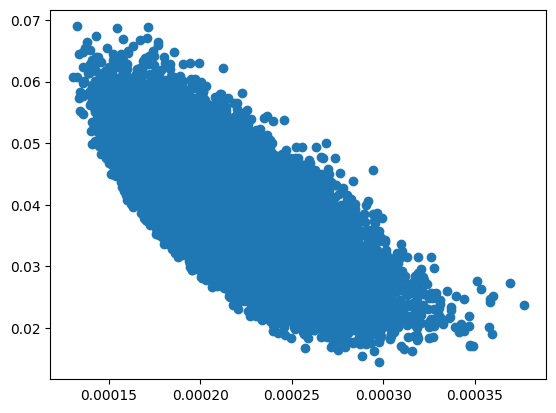

In [335]:
plt.scatter(data[2],data[1])
plt.show()

In [336]:
def GMV(portfolio):
      min_ = min(portfolio[2])
      index= np.where(portfolio[2]==min_)
      return [portfolio[0][index],portfolio[1][index],portfolio[2][index]]

In [337]:
GMV(data)

[array([[0.09677419, 0.19354839, 0.25806452, 0.03225806, 0.09677419,
         0.03225806, 0.03225806, 0.25806452]]),
 array([0.06070919]),
 array([0.00013054])]

In [338]:
def MaxSharpeRate(portfolio, rf):
    max_= max((portfolio[1]-rf)/portfolio[2])
    index=np.where(((portfolio[1]-rf)/portfolio[2])==max_)
    return  [portfolio[0][index],portfolio[1][index],portfolio[2][index]]


In [339]:
dat=MaxSharpeRate(data,0.001)
dat

[array([[0.12, 0.04, 0.32, 0.04, 0.08, 0.04, 0.04, 0.32]]),
 array([0.06894722]),
 array([0.0001329])]

In [340]:
def calcul_Rp(data, pond):
    return np.dot(data,pond.T)

In [341]:
Rp=calcul_Rp(tada,dat[0])
np.mean(Rp)
(np.mean(Rp)+1)**21 -1

0.09047164775416316

In [342]:
rm=yf.download("^GSPC",start_date,end_date)
Rm=rm[["Adj Close"]].pct_change().dropna()
Rm.mean()
(Rm.mean()+1)**16 -1


[*********************100%***********************]  1 of 1 completed


Adj Close    0.024804
dtype: float64

In [343]:
def beta(Rm,Rp):
    data=pd.DataFrame()
    data[["Rm"]]=Rm
    data[["Rp"]]=Rp
    return (data.cov().iloc[1,0]/np.var(data[["Rm"]])).iloc[0]

In [344]:
beta(Rm,Rp)


0.5622276626162427

In [345]:

def beta_fit(Rp,Rm):
    data=pd.DataFrame()
    data=Rm
    data[["Rp"]]=Rp
    
    model= smf.OLS(Rp,Rm[["Adj Close"]])
    fit=model.fit()
    return fit.params

beta_fit(Rp,Rm) 

Adj Close    0.57461
dtype: float64

In [346]:
def treynor(Rp, Rm,rf):
    return (np.mean(Rp-rf))/beta(Rm,Rp)

In [347]:
treynor(Rp, Rm,0.005)

ValueError: Columns must be same length as key

In [ ]:
def alphaJensen(Rp, Rm,rf):
    return np.mean(Rp)-(rf + beta(Rm,Rp)*(Rm.mean().iloc[0]-rf))

In [ ]:
alphaJensen(Rp, Rm,0.05)

ValueError: Columns must be same length as key

In [ ]:
Rm.mean().iloc[0]

0.0008100946585958208